<a href="https://colab.research.google.com/github/yerinsally/2022_PythonML/blob/main/15_final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 11. 특강 실습코드

## preprocessing

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
%matplotlib inline

# 데이터프레임 생성 및 스케일링 적용
x = (np.arange(10, dtype=np.float) - 3).reshape(-1, 1)
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]),
                  columns=["x", "scale(x)", "robust_scale(x)", "minmax_scale(x)", "maxabs_scale(x)"])
print(df)

     x  scale(x)  robust_scale(x)  minmax_scale(x)  maxabs_scale(x)
0 -3.0 -1.566699        -1.000000         0.000000        -0.500000
1 -2.0 -1.218544        -0.777778         0.111111        -0.333333
2 -1.0 -0.870388        -0.555556         0.222222        -0.166667
3  0.0 -0.522233        -0.333333         0.333333         0.000000
4  1.0 -0.174078        -0.111111         0.444444         0.166667
5  2.0  0.174078         0.111111         0.555556         0.333333
6  3.0  0.522233         0.333333         0.666667         0.500000
7  4.0  0.870388         0.555556         0.777778         0.666667
8  5.0  1.218544         0.777778         0.888889         0.833333
9  6.0  1.566699         1.000000         1.000000         1.000000


<ipython-input-1-5fd690fdddbf>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = (np.arange(10, dtype=np.float) - 3).reshape(-1, 1)


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data
data2 = scale(iris.data)

print("old mean:", np.mean(data1, axis=0))
print("old std: ", np.std(data1, axis=0))
print("new mean:", np.mean(data2, axis=0))
print("new std: ", np.std(data2, axis=0))

old mean: [5.84333333 3.05733333 3.758      1.19933333]
old std:  [0.82530129 0.43441097 1.75940407 0.75969263]
new mean: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
new std:  [1. 1. 1. 1.]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


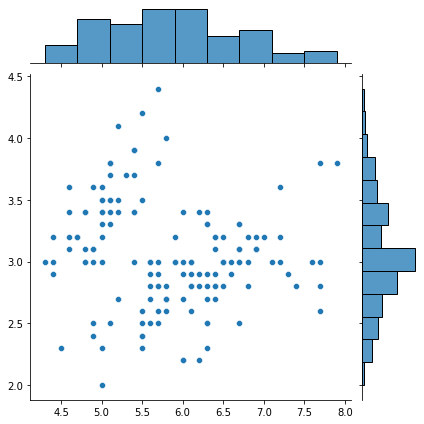

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


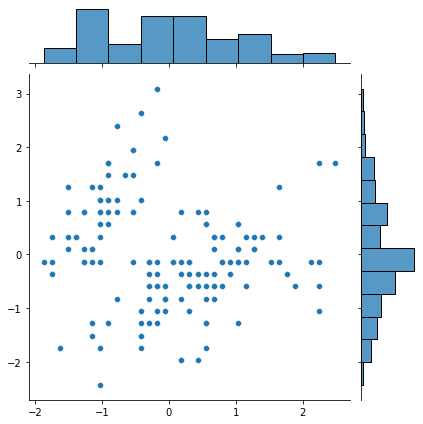

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.jointplot(data1[:,0], data1[:,1])
plt.show()
sns.jointplot(data2[:,0], data2[:,1]) # 스케일링 된 데이터
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data1)
data2 = scaler.transform(data1)

print(data1.std(), data2.std())

1.9738430577598278 1.0


## k_means
    KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=1e-4, precompute_distances='deprecated', verbose=0, random_state=None, 
            copy_x=True, n_jobs='deprecated', algorithm='auto')

- init 파라미터의 default 값은 k-mean++

  → k-mean++는 초기 Centroid를 정하는 방법 중 하나, 먼저 맨 처음 데이터를 centroid1로 정하고 centroid1로부터 가장 멀리 떨어져 있는 데이터를 centroid2로 정함. centroid1과 centroid2로부터 가장 멀리 떨어져 있는 데이터를 centroid3로 둠.
이렇게 K번 반복하여 초기 centroid를 정해주는 것, 임의로 정하거나 랜덤하게 정하는 것보다 iteration 횟수를 줄여주어 좀 더 효율적임
- max_iter=300

  → 클러스터에 assign되는 데이터가 없을 때까지 반복, max_iter를 정해주면 max_iter까지 하거나 assign 되는 데이터가 없을 때까지 반복, 보통 300번 이전에 끝나기 때문에 default가 300

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

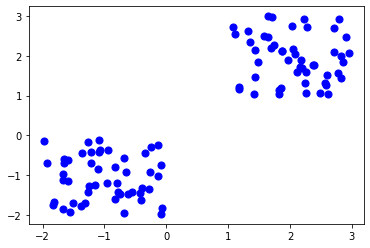

In [ ]:
# 데이터 준비
# -2 보다 크고 0보다 작은 100열 2행의 랜덤 어레이 생성
X = -2 * np.random.rand(100,2)

# 1보다 크고 3보다 작은 50열 2행의 랜덤 어레이 생성
X1 = 1 + 2 * np.random.rand(50,2)

# X의 50~100열을 X1의 값으로 대체 (클러스터를 구분하기 위한 데이터)
X[50:100, :] = X1

plt.scatter(x=X[:, 0], y=X[:, 1], s=50, c='b')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2)
kmean.fit(X)

KMeans(n_clusters=2)

In [ ]:
print("Cluster centers", kmean.cluster_centers_)

Cluster centers [[ 2.06356016  1.92848389]
 [-0.99834637 -1.06785187]]


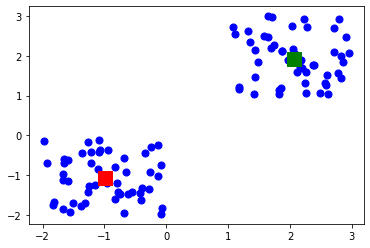

In [ ]:
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(kmean.cluster_centers_[0][0], kmean.cluster_centers_[0][1], s=200, c='g', marker='s')
plt.scatter(kmean.cluster_centers_[1][0], kmean.cluster_centers_[1][1], s=200, c='r', marker='s')
plt.show()

In [ ]:
# 예측 결과
predict = kmean.predict([[-1,-1],[9,9],[0.5,0.5]])
print(predict)

[1 0 0]


## 선형회귀
linear regression

In [ ]:
# 필요한 모듈 import
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# 당뇨병 데이터셋 가져오기
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data[:, np.newaxis, 2]

In [ ]:
# 훈련 세트, 테스트 세트 데이터 분리
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [ ]:
# 훈련 세트, 테스트 세트 타겟값 분리
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [ ]:
# 선형회귀 모델 생성
regr = LinearRegression()

# 훈련 세트를 사용해서 모델 훈련
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [ ]:
# 계수(가중치)
print('Coefficients: ', regr.coef_)

# 편향(절편)
print('Intercept: ', regr.intercept_)

# 평균 제곱근 편차
print("Mean squared error: %.2f" % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))

# scikit-learn은 훈련데이터에서 유도된 속성은 항상 끝에 밑줄을 붙인다.
# regr.coef_, regr.intercept_ 처럼 밑줄을 붙임으로써 사용자가 지정한 변수와 구분할 수 있습니다.

Coefficients:  [938.23786125]
Intercept:  152.91886182616167
Mean squared error: 2548.07


In [ ]:
# 훈련데이터 성능
print('TrainSet score: %.2f' % regr.score(diabetes_X_train, diabetes_y_train))

# 테스트데이터 성능
print('TestSet score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

TrainSet score: 0.34
TestSet score: 0.47


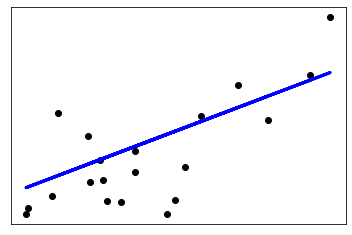

In [ ]:
# 도표 결과
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## SVM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=40, centers=2, random_state=20)

In [ ]:
clf = svm.SVC(kernel='linear') # rbf
clf.fit(X, y)

newData = [[3,4]]
print(clf.predict(newData))

[0]


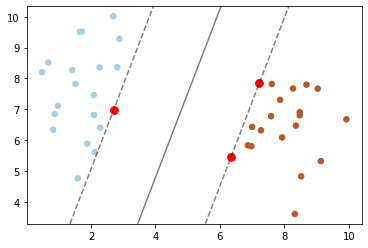

In [ ]:
# 샘플 데이터 표현
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)

# 초평면(Hyper-Plane) 표현
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])

# 지지벡터(Support Vector) 표현
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=60, facecolors='r')
plt.show()

# 12. 머신러닝 모델

## Decision Tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

# 데이터 불러와서 X, y 설정하기
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/data/Fvote.csv', encoding='utf-8')
X = data[['gender_female', 'gender_male', 'region_Chungcheung', 'region_Honam', 
          'region_Others', 'region_Sudo', 'region_Youngnam', 'edu', 'income', 
           'age', 'score_gov', 'score_progress', 'score_intention']]
y = data[['vote']]

# 데이터셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': range(2,20,2), 'min_samples_leaf': range(1,50,2)}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

result_grid = pd.DataFrame(grid_search.cv_results_)
# result_grid

Best Parameter: {'max_depth': 4, 'min_samples_leaf': 3}
Best Cross-validity Score: 0.709
Test set Score: 0.774


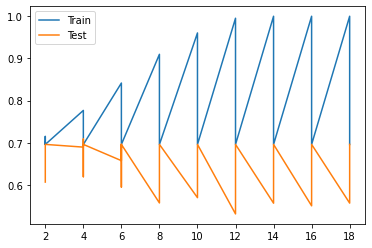

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_max_depth'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_max_depth'], result_grid['mean_test_score'], label="Test")
plt.legend()

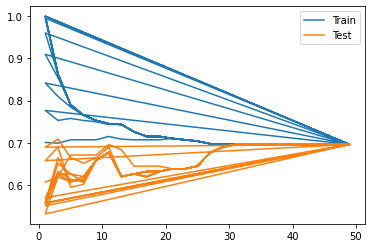

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_min_samples_leaf'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_min_samples_leaf'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier

param_distribs = {'max_depth': randint(low=1, high=20), 
                  'min_samples_leaf': randint(low=1, high=50)}
random_search = RandomizedSearchCV(DecisionTreeClassifier(), 
                                   param_distributions=param_distribs, cv=5, return_train_score=True)
random_search.fit(X_train, y_train)

print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))
# 최적의 파라미터 도출 : max_depth

result_random = random_search.cv_results_
# pd.DataFrame(result_random)

Best Parameter: {'max_depth': 7, 'min_samples_leaf': 39}
Best Cross-validity Score: 0.696
Test set Score: 0.755


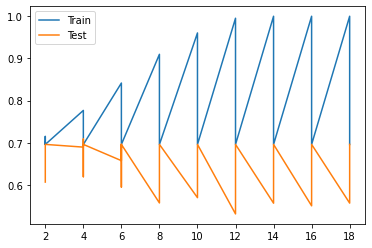

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_max_depth'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_max_depth'], result_grid['mean_test_score'], label="Test")
plt.legend()

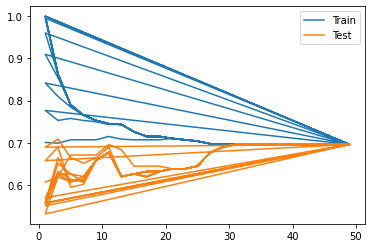

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_min_samples_leaf'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_min_samples_leaf'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

### 의사결정나무 모델

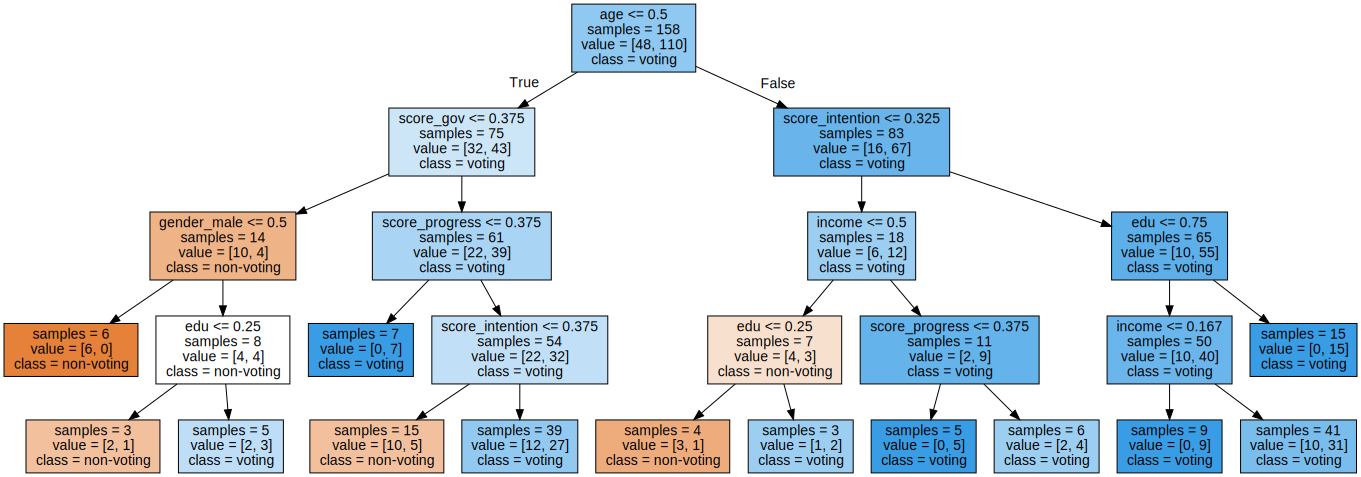

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)
tree.fit(X_train, y_train)

import graphviz
import os
from sklearn.tree import export_graphviz
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

export_graphviz(tree, out_file="tree.dot", class_names=["non-voting", "voting"],
                feature_names=X.columns, impurity=False, filled=True)

with open("tree.dot", encoding ="euc-kr") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

특성 중요도:
[0.         0.08929452 0.         0.         0.         0.
 0.         0.09297696 0.11338358 0.22454216 0.14834275 0.13871857
 0.19274146]


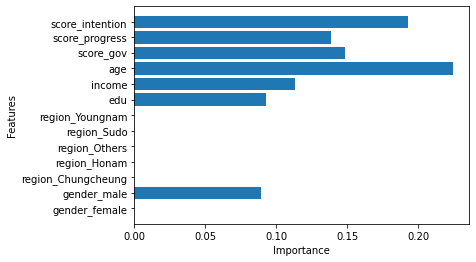

In [ ]:
# 변수 중요도 시각화
import matplotlib.pyplot as plt
import numpy as np

print("특성 중요도:\n{}".format(tree.feature_importances_))

def plot_feature_importances_tree(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances_tree(tree)

### 모델평가

In [ ]:
from sklearn.metrics import confusion_matrix
pred_train = tree.predict(X_train)
confusion_train = confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

pred_test = tree.predict(X_test)
confusion_test = confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_test)

훈련데이터 오차행렬:
 [[ 21  27]
 [  7 103]]
테스트 데이터 오차행렬:
 [[ 5  8]
 [ 4 36]]


In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred_test)
print("f1 score:\n", f1)

from sklearn.metrics import classification_report
cfreport = classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport)

f1 score:
 0.8571428571428572
분류예측 레포트:
               precision    recall  f1-score   support

           0       0.56      0.38      0.45        13
           1       0.82      0.90      0.86        40

    accuracy                           0.77        53
   macro avg       0.69      0.64      0.66        53
weighted avg       0.75      0.77      0.76        53



### 다중분류

In [ ]:
X = data[['gender_female', 'gender_male', 'region_Chungcheung', 'region_Honam', 
          'region_Others', 'region_Sudo', 'region_Youngnam', 'edu', 'income', 
           'age', 'score_gov', 'score_progress', 'score_intention']]
y = data[['parties']]
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

# Random Search
param_distribs = {'max_depth': randint(low=1, high=20), 
                  'min_samples_leaf': randint(low=1, high=50)}
random_search=RandomizedSearchCV(DecisionTreeClassifier(), 
                                 param_distributions=param_distribs, cv=5, return_train_score=True)
random_search.fit(X_train, y_train)
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))
result_random = random_search.cv_results_

# 시각화는 위 과정과 똑같음

Best Parameter: {'max_depth': 2, 'min_samples_leaf': 12}
Best Cross-validity Score: 0.501
Test set Score: 0.528


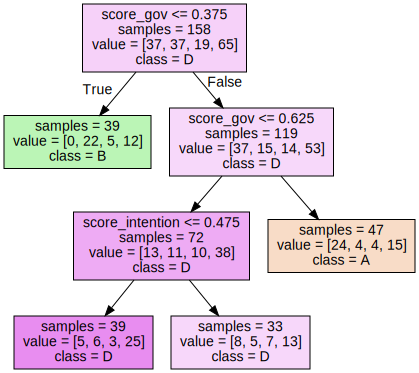

특성 중요도:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.89161792 0.
 0.10838208]


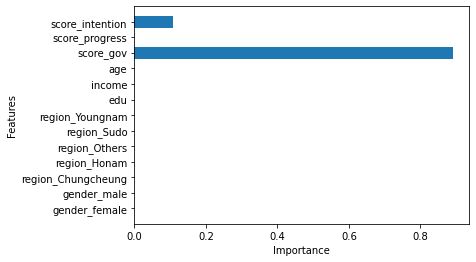

In [ ]:
tree = DecisionTreeClassifier(max_depth=9, min_samples_leaf=33)
tree.fit(X_train, y_train)
export_graphviz(tree, out_file="tree_party.dot", class_names=["A", "B", "C", "D"],
                feature_names=X.columns, impurity=False, filled=True)
with open("tree_party.dot", encoding ="euc-kr") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

print("특성 중요도:\n{}".format(tree.feature_importances_))
def plot_feature_importances_tree(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
plot_feature_importances_tree(tree)

In [ ]:
pred_train=tree.predict(X_train)
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

pred_test=tree.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_test)

f1 = f1_score(y_test, pred_test, average="micro" )
f2 = f1_score(y_test, pred_test, average="macro" )
print("micro f1 score:\n", f1)
print("macro f1 score:\n", f2)

cfreport = classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport)

훈련데이터 오차행렬:
 [[24  0  0 13]
 [ 4 22  0 11]
 [ 4  5  0 10]
 [15 12  0 38]]
테스트 데이터 오차행렬:
 [[ 8  1  0  4]
 [ 0 10  0  6]
 [ 3  0  0  3]
 [ 3  2  0 13]]
micro f1 score:
 0.5849056603773585
macro f1 score:
 0.46828921397886913
분류예측 레포트:
               precision    recall  f1-score   support

           1       0.57      0.62      0.59        13
           2       0.77      0.62      0.69        16
           3       0.00      0.00      0.00         6
           4       0.50      0.72      0.59        18

    accuracy                           0.58        53
   macro avg       0.46      0.49      0.47        53
weighted avg       0.54      0.58      0.55        53



## SVM

Best Parameter: {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
Best Cross-validity Score: 0.696
Test set Score: 0.755


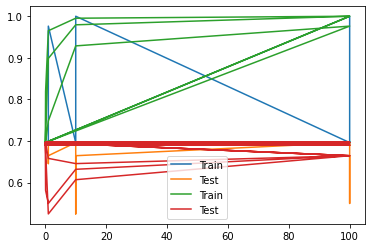

In [ ]:
X=data[['gender_female', 'gender_male', 'region_Chungcheung', 'region_Honam', 
        'region_Others', 'region_Sudo', 'region_Youngnam', 'edu', 'income', 
        'age', 'score_gov', 'score_progress', 'score_intention']]
y=data[['vote']]
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

# Grid Search
from sklearn.svm import SVC
param_grid=[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, 
            {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))
result_grid= pd.DataFrame(grid_search.cv_results_)
# result_grid
plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label="Test")
plt.legend()
plt.plot(result_grid['param_gamma'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_gamma'], result_grid['mean_test_score'], label="Test")
plt.legend()

Best Parameter: {'C': 92, 'gamma': 92, 'kernel': 'rbf'}
Best Cross-validity Score: 0.665
Test set Score: 0.755


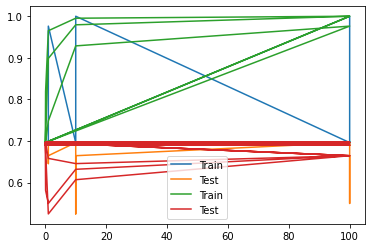

In [ ]:
# Random Search
param_distribs={'kernel': ['rbf'], 'C': randint(low=0.001, high=100), 
                'gamma': randint(low=0.001, high=100)}
random_search = RandomizedSearchCV(SVC(), param_distributions=param_distribs, cv=5, return_train_score=True)
random_search.fit(X_train, y_train)
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))
result_random = random_search.cv_results_
result_random = pd.DataFrame(result_random)
plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label="Test")
plt.legend()
plt.plot(result_grid['param_gamma'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_gamma'], result_grid['mean_test_score'], label="Test")
plt.legend()

In [ ]:
# 모델 평가
svc1 = SVC(C=12, gamma=79, kernel='rbf')
svc1.fit(X_train, y_train)
pred_train = svc1.predict(X_train)
confusion_train = confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

pred_test = svc1.predict(X_test)
confusion_test = confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)

f1 = f1_score(y_test, pred_test)
print("f1 score:\n", f1)
cfreport = classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport)

훈련데이터 오차행렬:
 [[ 48   0]
 [  0 110]]
테스트데이터 오차행렬:
 [[ 0 13]
 [ 0 40]]
f1 score:
 0.8602150537634409
분류예측 레포트:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.75      1.00      0.86        40

    accuracy                           0.75        53
   macro avg       0.38      0.50      0.43        53
weighted avg       0.57      0.75      0.65        53



In [ ]:
# 다중분류
X=data[['gender_female', 'gender_male', 'region_Chungcheung', 'region_Honam', 
        'region_Others', 'region_Sudo', 'region_Youngnam', 'edu', 'income', 
        'age', 'score_gov', 'score_progress', 'score_intention']]
y=data[['parties']]
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

from sklearn.svm import SVC
param_grid=[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, 
            {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]
grid_search=GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

# 모델 평가
svc2 = SVC(C=10, gamma=0.001, kernel='linear')
svc2.fit(X_train, y_train)
pred_train = svc2.predict(X_train)
confusion_train = confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

pred_test = svc2.predict(X_test)
confusion_test = confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)

f1 = f1_score(y_test, pred_test, average="micro")
f2 = f1_score(y_test, pred_test, average="macro")
cfreport = classification_report(y_test, pred_test)
print("micro f1 score:\n", f1)
print("macro f1 score:\n", f2)
print("분류예측 레포트:\n", cfreport)

Best Parameter: {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
Best Cross-validity Score: 0.571
Test set Score: 0.509
훈련데이터 오차행렬:
 [[23  2  3  9]
 [ 3 25  1  8]
 [ 2  1  6 10]
 [ 7  4  2 52]]
테스트데이터 오차행렬:
 [[ 5  2  1  5]
 [ 2  8  1  5]
 [ 2  0  1  3]
 [ 3  2  0 13]]
micro f1 score:
 0.5094339622641509
macro f1 score:
 0.44613997113997117
분류예측 레포트:
               precision    recall  f1-score   support

           1       0.42      0.38      0.40        13
           2       0.67      0.50      0.57        16
           3       0.33      0.17      0.22         6
           4       0.50      0.72      0.59        18

    accuracy                           0.51        53
   macro avg       0.48      0.44      0.45        53
weighted avg       0.51      0.51      0.50        53



## Random Forest

In [ ]:
X=data[['gender_female', 'gender_male', 'region_Chungcheung', 'region_Honam', 
        'region_Others', 'region_Sudo', 'region_Youngnam', 'edu', 'income', 
        'age', 'score_gov', 'score_progress', 'score_intention']]
y=data[['vote']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

# Grid Search
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators': range(100, 1000, 100), 
            'max_features': ['auto', 'sqrt', 'log2']}
from sklearn.ensemble import RandomForestClassifier
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))
result_grid = pd.DataFrame(grid_search.cv_results_)
# result_grid

Best Parameter: {'max_features': 'auto', 'n_estimators': 500}
Best Cross-validity Score: 0.657
Test set Score: 0.755


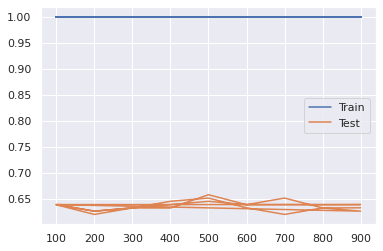

In [ ]:
import matplotlib.pyplot as plt
#plt.plot(result_grid['param_max_features'], 
#         result_grid['mean_train_score'], label="Train")
#plt.plot(result_grid['param_max_features'], 
#         result_grid['mean_test_score'], label="Test")
#plt.legend()

plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

In [ ]:
# Random Search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {'n_estimators': randint(low=100, high=1000), 
                  'max_features': ['auto', 'sqrt', 'log2']}
from sklearn.ensemble import RandomForestClassifier
random_search=RandomizedSearchCV(RandomForestClassifier(), 
                                 param_distributions=param_distribs, cv=5, return_train_score=True)
random_search.fit(X_train, y_train)
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))
result_random = random_search.cv_results_
# pd.DataFrame(result_random)

Best Parameter: {'max_features': 'log2', 'n_estimators': 342}
Best Cross-validity Score: 0.651
Test set Score: 0.755


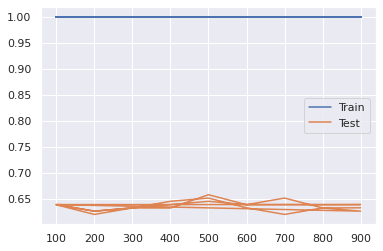

In [ ]:
import matplotlib.pyplot as plt
#plt.plot(result_grid['param_max_features'], 
#         result_grid['mean_train_score'], label="Train")
#plt.plot(result_grid['param_max_features'], 
#         result_grid['mean_test_score'], label="Test")
#plt.legend()

plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

특성 중요도:
[0.03117164 0.02932785 0.0251877  0.02394789 0.02301014 0.03328876
 0.02187061 0.07496693 0.0925119  0.11155494 0.12571657 0.12393262
 0.28351243]


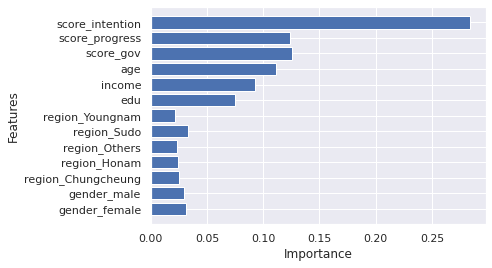

In [ ]:
# 변수 중요도 시각화
from sklearn.ensemble import RandomForestClassifier
Forest = RandomForestClassifier(max_features='auto', n_estimators=492)
Forest.fit(X_train, y_train)
print("특성 중요도:\n{}".format(Forest.feature_importances_))

import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_forest(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
plot_feature_importances_forest(Forest)

In [ ]:
# 모델평가
from sklearn.ensemble import RandomForestClassifier
Forest = RandomForestClassifier(max_features='auto', n_estimators=492)
Forest.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
pred_train = Forest.predict(X_train)
confusion_train = confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

pred_test = Forest.predict(X_test)
confusion_test = confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_test)

from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred_test)
print("f1 score:\n", f1)
from sklearn.metrics import classification_report
cfreport = classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport)

훈련데이터 오차행렬:
 [[ 48   0]
 [  0 110]]
테스트 데이터 오차행렬:
 [[ 4  9]
 [ 1 39]]
f1 score:
 0.8863636363636362
분류예측 레포트:
               precision    recall  f1-score   support

           0       0.80      0.31      0.44        13
           1       0.81      0.97      0.89        40

    accuracy                           0.81        53
   macro avg       0.81      0.64      0.67        53
weighted avg       0.81      0.81      0.78        53



Best Parameter: {'max_features': 'log2', 'n_estimators': 928}
Best Cross-validity Score: 0.463
Test set Score: 0.509
특성 중요도:
[0.05466241 0.10924648 0.07672126 0.105809   0.09085813 0.18189971
 0.14208915 0.23871386]
훈련데이터 오차행렬:
 [[36  0  1  0]
 [ 0 37  0  0]
 [ 0  0 19  0]
 [ 0  0  0 65]]
테스트 데이터 오차행렬:
 [[ 5  2  1  5]
 [ 0  9  3  4]
 [ 2  0  1  3]
 [ 2  2  2 12]]
micro f1 score:
 0.5094339622641509
macro f1 score:
 0.4501274587481484
분류예측 레포트:
               precision    recall  f1-score   support

           1       0.56      0.38      0.45        13
           2       0.69      0.56      0.62        16
           3       0.14      0.17      0.15         6
           4       0.50      0.67      0.57        18

    accuracy                           0.51        53
   macro avg       0.47      0.45      0.45        53
weighted avg       0.53      0.51      0.51        53



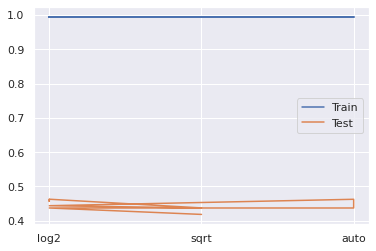

In [ ]:
# 다중분류
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/data/vote.csv', encoding='utf-8')
X=data[['gender', 'region', 'edu', 'income', 'age', 
        'score_gov', 'score_progress', 'score_intention']]
y=data[['parties']]
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42 )

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {'n_estimators': randint(low=100, high=1000), 
                  'max_features': ['auto', 'sqrt', 'log2']}
from sklearn.ensemble import RandomForestClassifier
random_search=RandomizedSearchCV(RandomForestClassifier(), 
                                 param_distributions=param_distribs, cv=5, return_train_score=True)
random_search.fit(X_train, y_train)
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))
result_random = random_search.cv_results_
#pd.DataFrame(result_random)
import matplotlib.pyplot as plt
plt.plot(result_random['param_max_features'], 
         result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_max_features'], 
         result_random['mean_test_score'], label="Test")
plt.legend()

# 변수 중요도 시각화
from sklearn.ensemble import RandomForestClassifier
Forest=RandomForestClassifier(max_features='log2', n_estimators=478)
Forest.fit(X_train, y_train)
print("특성 중요도:\n{}".format(Forest.feature_importances_))
import matplotlib.pyplot as plt
import numpy as np
#def plot_feature_importances_Forest(model):
#    n_features = X.shape[1]
#    plt.barh(range(n_features), model.feature_importances_, align='center')
#    plt.yticks(np.arange(n_features), X.columns)
#    plt.xlabel("Importance")
#    plt.ylabel("Features")
#    plt.ylim(-1, n_features)
#plot_feature_importances_Forest(Forest)

# 모델평가
from sklearn.metrics import confusion_matrix
pred_train=Forest.predict(X_train)
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)
pred_test=Forest.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_test)

from sklearn.metrics import f1_score
f1=f1_score(y_test, pred_test, average="micro" )
f2=f1_score(y_test, pred_test, average="macro" )
print("micro f1 score:\n", f1)
print("macro f1 score:\n", f2)

from sklearn.metrics import classification_report
cfreport=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport)

## 손글씨 예측

(1797,)

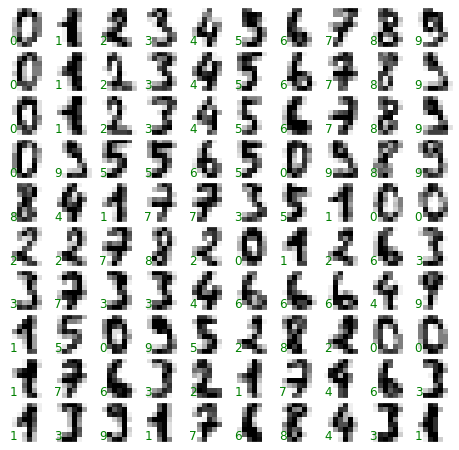

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import seaborn as sns; sns.set()
from sklearn.datasets import load_digits

digits = load_digits()
digits.images.shape

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

X = digits.data
X.shape
y = digits.target
y.shape

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  4  0]
 [ 0  7 20  2  0  0  0  0 15  0]
 [ 0  0  0 39  0  0  0  1  5  0]
 [ 0  1  0  0 31  0  0  6  0  0]
 [ 0  1  0  1  0 43  0  3  0  0]
 [ 0  0  1  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  6  0  1  0  1  0  2 38  0]
 [ 0  2  0  4  1  0  0  3  7 30]]


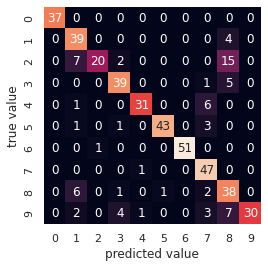

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');
print(mat)

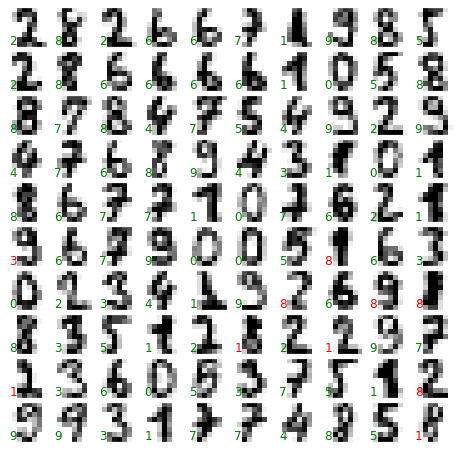

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')
# 오분류된 개체는 빨간색으로 나타내기

# 13. 선형 / Ridge / Lasso 회귀분석

## 선형

단일 회귀분석

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           2.83e-91
Time:                        07:11:13   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--

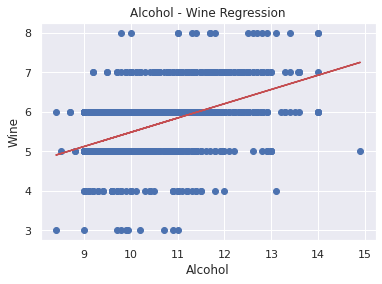

lr.coef_: [[0.37699262]]
lr.intercept_: [1.69472474]
훈련 세트 R-square: 0.24
테스트 세트 R-square: 0.19


In [ ]:
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MachineLearning/data/wine.csv",sep=',')
data.shape

# 단일 회귀분석
import statsmodels.api as sm
model = sm.OLS(data['quality'],sm.add_constant(data['alcohol'])).fit()
print (model.summary())
model.params

plt.scatter(data['alcohol'], data['quality'],label = 'Actual Data')
plt.plot(data['alcohol'],model.params[0]+model.params[1]*data['alcohol'],
         c ='r',label="Regression fit")
plt.title('Alcohol - Wine Regression')
plt.xlabel('Alcohol')
plt.ylabel('Wine')
plt.show()

# 모델 적용
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(data['alcohol'], data["quality"], train_size = 0.7,random_state=42)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("훈련 세트 R-square: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 R-square: {:.2f}".format(lr.score(X_test, y_test)))

다중 회귀분석

In [ ]:
X = data[data.columns[0:11]]
y = data[['quality']]
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.7, random_state=42)
x_train_new = sm.add_constant(X_train)
x_test_new = sm.add_constant(X_test)

# train data
multi_model = sm.OLS(y_train,x_train_new).fit()
print(multi_model.summary())

y_pred = multi_model.predict(x_test_new)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns = ['y_pred']
pred_data = pd.DataFrame(y_pred_df['y_pred'])
y_test_new = pd.DataFrame(y_test)
pred_data['y_test'] = pd.DataFrame(y_test_new['quality'])

# test data
multi_model2 = sm.OLS(y_test,x_test_new).fit()
print (multi_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     56.90
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          8.34e-100
Time:                        07:11:14   Log-Likelihood:                -1103.5
No. Observations:                1119   AIC:                             2231.
Df Residuals:                    1107   BIC:                             2291.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   17.9626 

scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression
linear1 = LinearRegression()
linear1.fit(X_train, y_train)
linear1.score(X_train, y_train)

0.3611982441321645

In [ ]:
linear1.score(X_test, y_test)

0.351388533251739

In [ ]:
pred_train = linear1.predict(X_train)
pred_test = linear1.predict(X_test)

In [ ]:
linear2 = LinearRegression(normalize=True)
linear2.fit(X_train, y_train)
linear2.score(X_train, y_train)

0.3611982441321645

In [ ]:
linear2.score(X_test, y_test)

0.3513885332517398

## Ridge

Best Parameter: {'alpha': 1.0}
Best Cross-validity Score: 0.336
Test set Score: 0.347


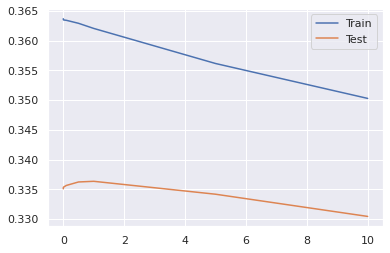

In [ ]:
X = data[data.columns[0:11]]
y = data[['quality']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=42)

# Grid Search
from sklearn.model_selection import GridSearchCV
param_grid={'alpha': [1e-4, 1e-3, 1e-2, 0.1, 0.5, 1.0, 5.0, 10.0]}
from sklearn.linear_model import Ridge
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))
result_grid = pd.DataFrame(grid_search.cv_results_)
# result_grid
import matplotlib.pyplot as plt
plt.plot(result_grid['param_alpha'],  result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_alpha'],  result_grid['mean_test_score'], label="Test")
plt.legend()

Best Parameter: {'alpha': 1}
Best Cross-validity Score: 0.336
Test set Score: 0.347


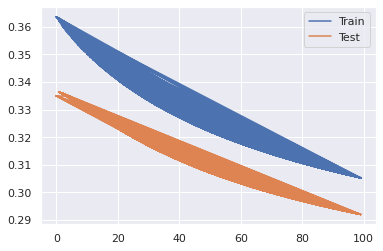

In [ ]:
# Random Search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {'alpha': randint(low=0.0001, high=100)}
random_search = RandomizedSearchCV(Ridge(), param_distributions=param_distribs, cv=5, n_iter=1000, return_train_score=True)
random_search.fit(X_train, y_train)
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))
result_random = pd.DataFrame(random_search.cv_results_)
# result_random
import matplotlib.pyplot as plt
plt.plot(result_random['param_alpha'], result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_alpha'], result_random['mean_test_score'], label="Test")
plt.legend()

## Lasso

Best Parameter: {'alpha': 0.0001}
Best Cross-validity Score: 0.335
Test set Score: 0.351


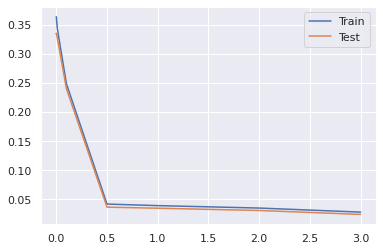

In [ ]:
X = data[data.columns[0:11]]
y = data[['quality']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=42)

# Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.5, 1.0, 2.0, 3.0]}
from sklearn.linear_model import Lasso
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))
result_grid= pd.DataFrame(grid_search.cv_results_)
# result_grid

import matplotlib.pyplot as plt
plt.plot(result_grid['param_alpha'],  result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_alpha'],  result_grid['mean_test_score'], label="Test")
plt.legend()

Best Parameter: {'alpha': 0}
Best Cross-validity Score: 0.335
Test set Score: 0.351


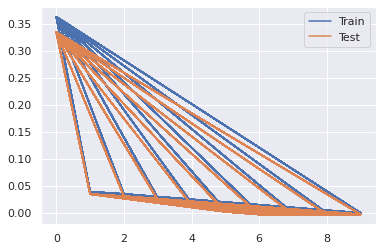

In [ ]:
# Random Search
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {'alpha': randint(low=0.00001, high=10)}
random_search = RandomizedSearchCV(Lasso(), param_distributions=param_distribs, 
                                   cv=5,  n_iter=1000, return_train_score=True)
random_search.fit(X_train, y_train)
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))
result_random = pd.DataFrame(random_search.cv_results_)
# result_random

import matplotlib.pyplot as plt
plt.plot(result_random['param_alpha'], result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_alpha'], result_random['mean_test_score'], label="Test")
plt.legend()